In [22]:
# Big Mart sales  - XGBoost Regressor

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

from sklearn import metrics


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [125]:
df=pd.read_csv(r'C:\Users\david\Desktop\Curso ML\Pandas\BigMart_sales_data.csv')

In [127]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [129]:
df.shape

(5681, 11)

In [131]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [135]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

valores categóricos

Item_Identifier
Item_Fat_Content           
Item_Type                  
Outlet_Identifier         
Outlet_Size               
Outlet_Location_Type       
Outlet_Type                

In [137]:
# manejamos missing values
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean()) # sustituimos por la media


In [139]:
#La columna Outlet_size y Outlet_type están correlacionadas. Tenemos diferentes tipos de tamaños vendidos 
#segun el tipo de tienda. Hacemos una tabla que muestre esto juento con la moda segun cada tipo de tienda

In [141]:
outlet_size=df.pivot_table(columns='Outlet_Type',values='Outlet_Size',aggfunc=(lambda x: x.mode()[0]))
print(outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [143]:
# otra forma de verlo
df.groupby(df['Outlet_Type'])['Outlet_Size'].apply(lambda x: x.mode()[0])
# no funcioanria:
#df.groupby(df['Outlet_Type'])['Item_Weight'].mean() porque moda puede devolver un conjunto de valores [] 
#si hay empete en la moda, algo que no acepta groupby

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [145]:
missing_values=df['Outlet_Size'].isnull()
print(missing_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [147]:
# sustituimos cada valor de moda de size según el tipo de tienda
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size[x])
#df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].map(outlet_size)

In [153]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

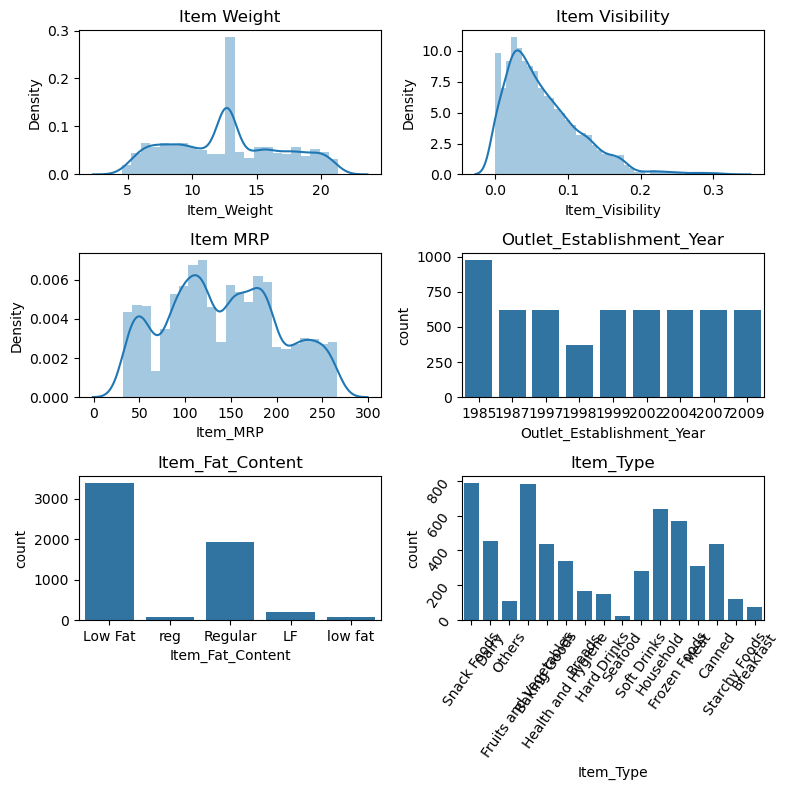

In [155]:
# analizamos los datos

# item weight/visibility distribution

fig,ax=plt.subplots(3,2,figsize=(8,8))
ax=ax.flatten()
sns.distplot(df['Item_Weight'],ax=ax[0])
sns.distplot(df['Item_Visibility'],ax=ax[1])
sns.distplot(df['Item_MRP'],ax=ax[2])
sns.countplot(x='Outlet_Establishment_Year', data=df,ax=ax[3])
sns.countplot(x='Item_Fat_Content', data=df,ax=ax[4])
sns.countplot(x='Item_Type', data=df,ax=ax[5])
ax[0].set_title('Item Weight')
ax[1].set_title('Item Visibility')
ax[2].set_title('Item MRP')
ax[3].set_title('Outlet_Establishment_Year')
ax[4].set_title('Item_Fat_Content')
ax[5].set_title('Item_Type')
ax[5].tick_params(rotation=55)

fig.tight_layout()

In [157]:
# valores categóricos
# cambiamos algunos nombres que salen repetidos pero con distintos nombre
df.replace({'Item_Fat_Content':{'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'}},inplace=True)
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [161]:
# label encoding
label=preprocessing.LabelEncoder()

In [163]:
df['Item_Identifier']=label.fit_transform(df['Item_Identifier'])

In [165]:
df['Item_Fat_Content']=label.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=label.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=label.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=label.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=label.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=label.fit_transform(df['Outlet_Type'])


In [173]:
# dividimos los datos -- > notengo esta columna en df
#X=df.drop(columns='Item_Outlet_Sales',axis=1)
#y=df['Item_Outlet_sales']

In [177]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
#print(X.shape,X_train.shape,X_test.shape)

In [179]:
# Entrenamiento del modelo XGBoost Regressor
#model=XGBRegressor

In [181]:
#model.fit(X_train,y_train)

In [189]:
# prediciton Train
#X_train_pred=model.predict(X_train)


In [191]:
# r2 value
#r2_train_value=metrics.r2_score(y_train,X_train_pred)
#print(r2_train_value) --> aprox=0.63

In [195]:
# prediciton Test
#X_test_pred=model.predict(X_test)


In [199]:
# r2 value
#r2_test_value=metrics.r2_score(y_test,X_train_pred)
#print(r2_test_value) --> aprox=0.58